In [25]:
## Importing necessary libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [26]:
## Importing the filtered data
data = pd.read_csv("D:/filtered_BA",index_col=0)
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,6,1,0,0,5.52,0
1,1,0,0,112,20,3,6,0,0,0,5.52,0
2,2,0,0,243,22,17,3,1,1,0,5.52,0
3,1,0,0,96,31,4,6,0,0,1,5.52,0
4,2,0,0,68,22,15,3,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,27,6,9,6,1,0,1,5.62,0
49996,1,0,0,111,6,4,7,0,0,0,5.62,0
49997,1,0,0,24,6,22,6,0,0,1,5.62,0
49998,1,0,0,15,6,11,1,1,0,1,5.62,0


In [27]:
## Seprate the target and features 
label = data["booking_complete"]
data.drop(columns=["booking_complete"],inplace=True)
data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,0,262,19,7,6,1,0,0,5.52
1,1,0,0,112,20,3,6,0,0,0,5.52
2,2,0,0,243,22,17,3,1,1,0,5.52
3,1,0,0,96,31,4,6,0,0,1,5.52
4,2,0,0,68,22,15,3,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...
49995,2,0,0,27,6,9,6,1,0,1,5.62
49996,1,0,0,111,6,4,7,0,0,0,5.62
49997,1,0,0,24,6,22,6,0,0,1,5.62
49998,1,0,0,15,6,11,1,1,0,1,5.62


In [28]:
## Preprocessing the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data))
scaled_data

,0,1,2,3,4,5,6,7,8,9,10
0,0.400684,-0.355785,-0.098041,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175
1,-0.579559,-0.355785,-0.098041,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175
2,0.400684,-0.355785,-0.098041,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175
3,-0.579559,-0.355785,-0.098041,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175
4,0.400684,-0.355785,-0.098041,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175
...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.355785,-0.098041,-0.640577,-0.502977,-0.012257,1.096754,0.703747,-0.649919,1.158082,-1.107368
49996,-0.579559,-0.355785,-0.098041,0.288108,-0.502977,-0.936026,1.598567,-1.420965,-0.649919,-0.863497,-1.107368
49997,-0.579559,-0.355785,-0.098041,-0.673744,-0.502977,2.389544,1.096754,-1.420965,-0.649919,1.158082,-1.107368
49998,-0.579559,-0.355785,-0.098041,-0.773246,-0.502977,0.357251,-1.412314,0.703747,-0.649919,1.158082,-1.107368


In [29]:
## Preparing the scaled dataframe
scaled_data.columns =['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']
scaled_data["target"] = label
scaled_data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,target
0,0.400684,-0.355785,-0.098041,1.957530,-0.119353,-0.381764,1.096754,0.703747,-0.649919,-0.863497,-1.174175,0
1,-0.579559,-0.355785,-0.098041,0.299164,-0.089844,-1.120780,1.096754,-1.420965,-0.649919,-0.863497,-1.174175,0
2,0.400684,-0.355785,-0.098041,1.747470,-0.030824,1.465775,-0.408687,0.703747,1.538654,-0.863497,-1.174175,0
3,-0.579559,-0.355785,-0.098041,0.122272,0.234761,-0.936026,1.096754,-1.420965,-0.649919,1.158082,-1.174175,0
4,0.400684,-0.355785,-0.098041,-0.187290,-0.030824,1.096267,-0.408687,0.703747,-0.649919,1.158082,-1.174175,0
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.400684,-0.355785,-0.098041,-0.640577,-0.502977,-0.012257,1.096754,0.703747,-0.649919,1.158082,-1.107368,0
49996,-0.579559,-0.355785,-0.098041,0.288108,-0.502977,-0.936026,1.598567,-1.420965,-0.649919,-0.863497,-1.107368,0
49997,-0.579559,-0.355785,-0.098041,-0.673744,-0.502977,2.389544,1.096754,-1.420965,-0.649919,1.158082,-1.107368,0
49998,-0.579559,-0.355785,-0.098041,-0.773246,-0.502977,0.357251,-1.412314,0.703747,-0.649919,1.158082,-1.107368,0


In [30]:
## Preparing train and test data from scaled dataframe
x = scaled_data.iloc[:,:-1]
y = scaled_data.iloc[:,-1]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state =42)

In [31]:
## Building the RandomForestClassifier Model and evaluating the classfication metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,classification_report,confusion_matrix
model1 = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)
model1.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)

In [32]:
## Checking training accuracy 
y_pred_train = model1.predict(x_train)
print("The Accuracy of the model is",accuracy_score(y_train,y_pred_train))
print("The Precision of the model is",precision_score(y_train,y_pred_train))
print("The Recall of the model is",recall_score(y_train,y_pred_train))
print("The F1 Score of the model is",f1_score(y_train,y_pred_train))
print("\n")
print(classification_report(y_train,y_pred_train))

The Accuracy of the model is 0.9398
The Precision of the model is 1.0
The Recall of the model is 0.5985328442814272
The F1 Score of the model is 0.7488527325823947


              precision    recall  f1-score   support

           0       0.93      1.00      0.97     34002
           1       1.00      0.60      0.75      5998

    accuracy                           0.94     40000
   macro avg       0.97      0.80      0.86     40000
weighted avg       0.94      0.94      0.93     40000



C:\Users\Tokii\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9398

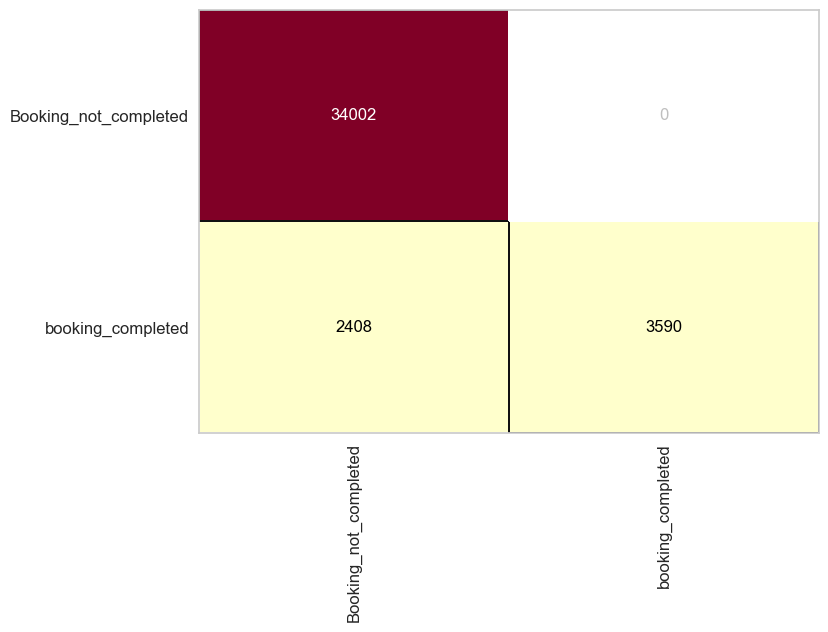

In [33]:
## Visualizing the confusion matrix 
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model1,classes=["Booking_not_completed","booking_completed"])
cm.fit(x_train,y_train)
cm.score(x_train,y_train)

In [34]:
## Checking the test accuracy 
y_pred_test = model1.predict(x_test)
print("The Accuracy of the model is",accuracy_score(y_test,y_pred_test))
print("The Precision of the model is",precision_score(y_test,y_pred_test))
print("The Recall of the model is",recall_score(y_test,y_pred_test))
print("The F1 Score of the model is",f1_score(y_test,y_pred_test))
print("\n")
print(classification_report(y_test,y_pred_test))

The Accuracy of the model is 0.8514
The Precision of the model is 0.47540983606557374
The Recall of the model is 0.03918918918918919
The F1 Score of the model is 0.07240948813982521


              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.48      0.04      0.07      1480

    accuracy                           0.85     10000
   macro avg       0.67      0.52      0.50     10000
weighted avg       0.80      0.85      0.79     10000



C:\Users\Tokii\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.8514

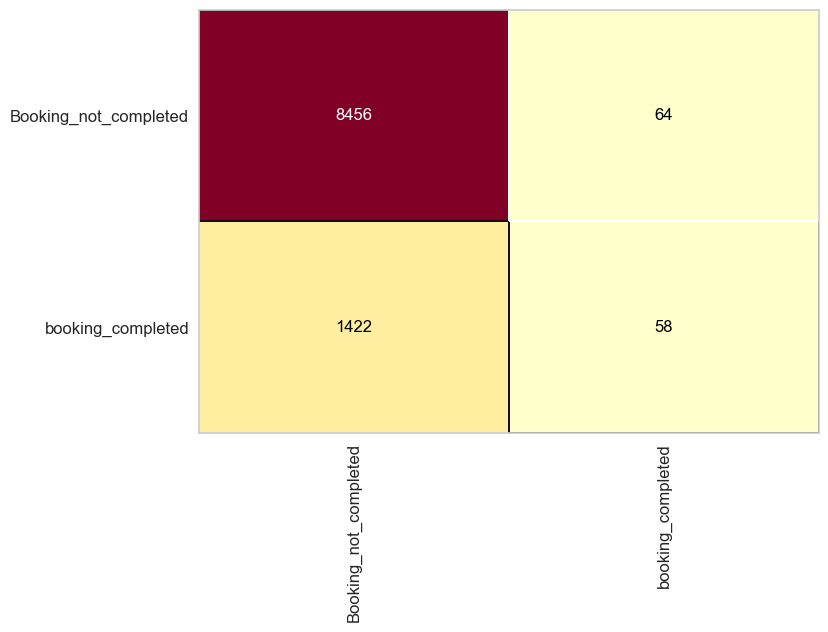

In [35]:
## Visualizing the confusion matrix 
from yellowbrick.classifier import ConfusionMatrix
cm1 = ConfusionMatrix(model1,classes=["Booking_not_completed","booking_completed"])
cm1.fit(x_test,y_test)
cm1.score(x_test,y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

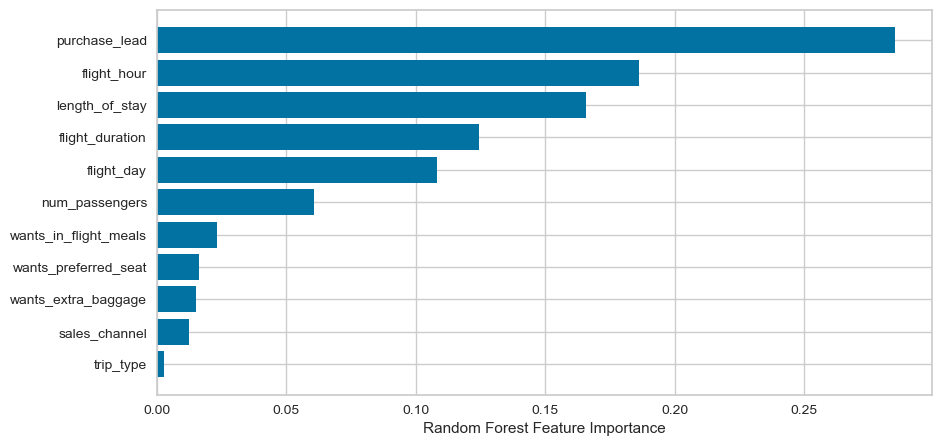

In [36]:
## Determining how each feature contributes to the model 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sorted_idx = model1.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx],model1.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [37]:
scaled_data["target"].value_counts()

0    42522
1     7478
Name: target, dtype: int64

#### Here the F1 Score of the model is very low because the dataset in which the model is trained is highly imbalanced 

In [38]:
## Trying Cross Validation to reduce the effect of Imbalance
from sklearn.model_selection import KFold,cross_val_score
model1 = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)
k_fold = KFold(n_splits=5)
score = cross_val_score(model1,x,y,cv=k_fold,scoring="f1")
score.mean()

0.026155430747406498

#### Tried Cross Validation but it doesn't work . So, We are oversampling the dataset. We are doing oversampling than undersampling because  it doesnot affect the performance of the majority class. SMOTE artifically introduces by K nearest  neighbour   

In [39]:
# Implementing Oversampling for Handling Imbalanced 
from imblearn.over_sampling import SMOTE
smk = SMOTE(random_state=42)
x_res,y_res=smk.fit_resample(x,y)
print(x.shape,y.shape)
print(x_res.shape,y_res.shape)

(50000, 11) (50000,)
(85044, 11) (85044,)


In [40]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state =42)
model = RandomForestClassifier(max_depth =50 , min_samples_split=5,random_state=0)
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, min_samples_split=5, random_state=0)

In [41]:
## Checking training accuracy 
y_pred_train = model.predict(x_train)
print("The Accuracy of the model is",accuracy_score(y_train,y_pred_train))
print("The Precision of the model is",precision_score(y_train,y_pred_train))
print("The Recall of the model is",recall_score(y_train,y_pred_train))
print("The F1 Score of the model is",f1_score(y_train,y_pred_train))
print("\n")
print(classification_report(y_train,y_pred_train))

The Accuracy of the model is 0.9878444918056882
The Precision of the model is 0.9992465340566606
The Recall of the model is 0.9763818947492416
The F1 Score of the model is 0.9876819041661081


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     34078
           1       1.00      0.98      0.99     33957

    accuracy                           0.99     68035
   macro avg       0.99      0.99      0.99     68035
weighted avg       0.99      0.99      0.99     68035



C:\Users\Tokii\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9878444918056882

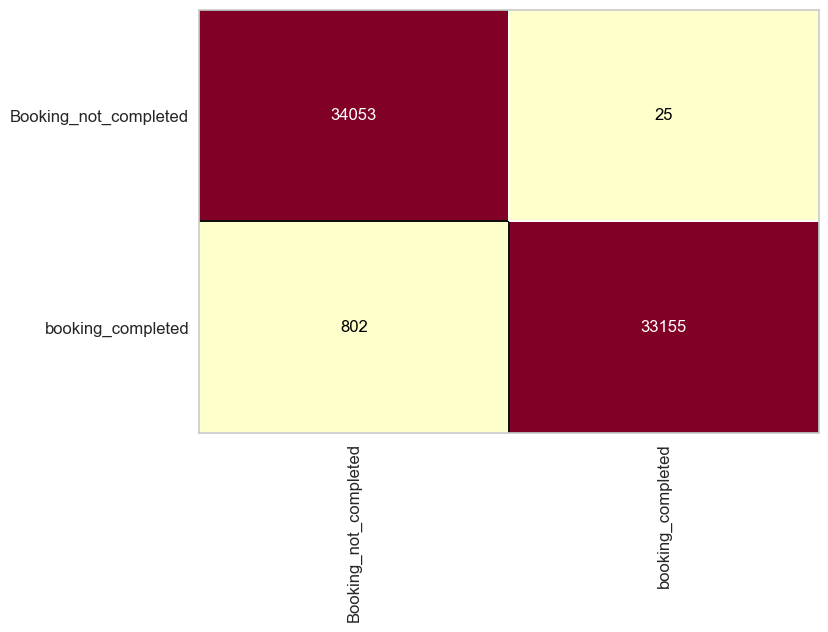

In [42]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(model,classes=["Booking_not_completed","booking_completed"])
cm.fit(x_train,y_train)
cm.score(x_train,y_train)

In [43]:
## Checking the test accuracy 
y_pred_test = model.predict(x_test)
print("The Accuracy of the model is",accuracy_score(y_test,y_pred_test))
print("The Precision of the model is",precision_score(y_test,y_pred_test))
print("The Recall of the model is",recall_score(y_test,y_pred_test))
print("The F1 Score of the model is",f1_score(y_test,y_pred_test))
print("\n")
print(classification_report(y_test,y_pred_test))

The Accuracy of the model is 0.9015227232641543
The Precision of the model is 0.9491525423728814
The Recall of the model is 0.8499708114419148
The F1 Score of the model is 0.8968278410840776


              precision    recall  f1-score   support

           0       0.86      0.95      0.91      8444
           1       0.95      0.85      0.90      8565

    accuracy                           0.90     17009
   macro avg       0.91      0.90      0.90     17009
weighted avg       0.91      0.90      0.90     17009



C:\Users\Tokii\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9015227232641543

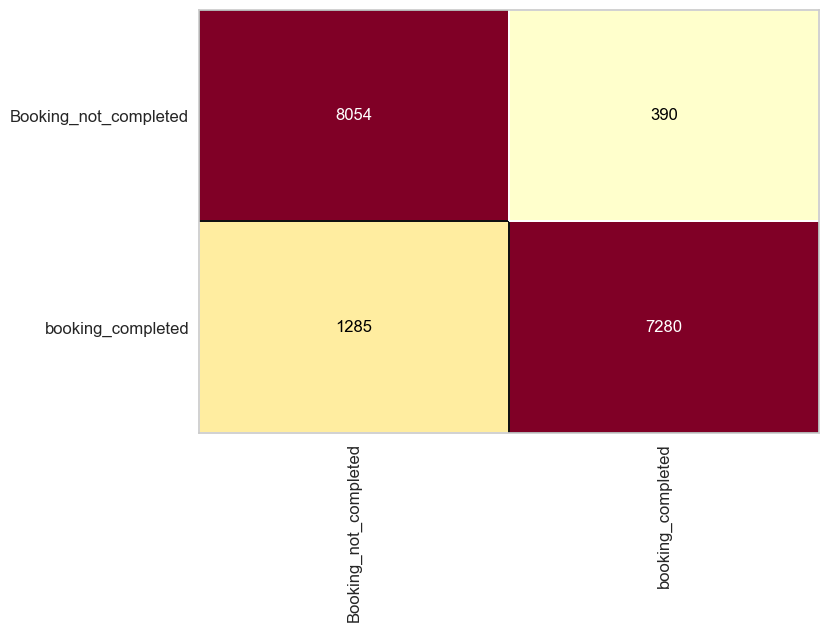

In [44]:
## Visualizing the confusion matrix 
from yellowbrick.classifier import ConfusionMatrix
cm1 = ConfusionMatrix(model,classes=["Booking_not_completed","booking_completed"])
cm1.fit(x_test,y_test)
cm1.score(x_test,y_test)

In [45]:
## Checking whhich datapoints have target booking completed
new = scaled_data[scaled_data["target"]==1]
new

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,target
82,-0.579559,-0.355785,-0.098041,-0.773246,0.234761,1.465775,-1.412314,-1.420965,-0.649919,-0.863497,1.037139,1
86,-0.579559,-0.355785,-0.098041,0.785618,-0.119353,0.911513,-1.412314,0.703747,-0.649919,-0.863497,1.037139,1
94,-0.579559,-0.355785,-0.098041,1.062012,1.887296,-1.305534,-0.910501,0.703747,-0.649919,1.158082,1.037139,1
109,-0.579559,2.810688,-0.098041,0.465001,-0.178372,1.281021,-0.910501,0.703747,-0.649919,1.158082,1.037139,1
122,-0.579559,-0.355785,-0.098041,-0.474740,-0.178372,0.911513,-0.910501,-1.420965,-0.649919,-0.863497,1.037139,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49972,-0.579559,-0.355785,-0.098041,-0.574242,-0.502977,-0.566518,-0.408687,0.703747,1.538654,-0.863497,-1.742035,1
49977,0.400684,-0.355785,-0.098041,-0.773246,-0.502977,1.281021,-0.910501,0.703747,1.538654,1.158082,-1.742035,1
49980,2.361172,-0.355785,-0.098041,1.736415,-0.502977,-0.012257,-0.910501,0.703747,-0.649919,1.158082,-1.521571,1
49984,0.400684,-0.355785,-0.098041,-0.861692,-0.502977,-0.936026,-0.408687,-1.420965,-0.649919,-0.863497,-1.107368,1


In [46]:
## Predicting single datapoint 
model.predict(x.iloc[49987,:].to_numpy().reshape(1, -1))

C:\Users\Tokii\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

Text(0.5, 0, 'Random Forest Feature Importance')

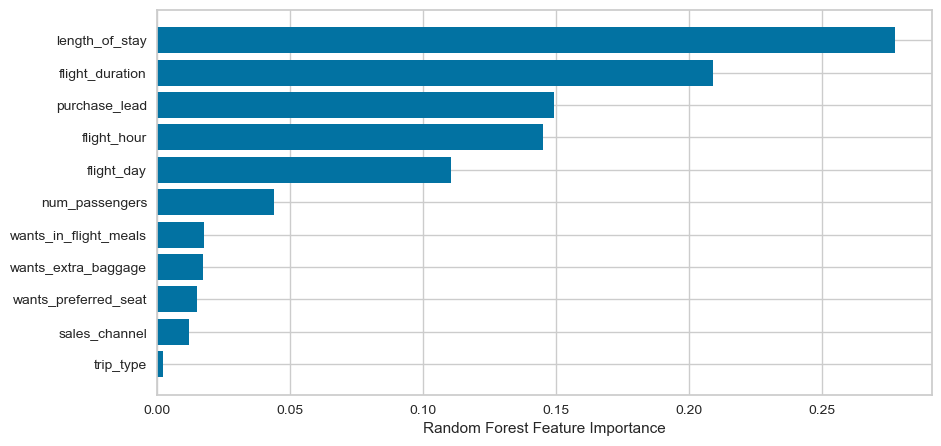

In [47]:
## Determining how each feature contributes to the model 
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sorted_idx = model.feature_importances_.argsort()
plt.barh(x.columns[sorted_idx],model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")